##### CIS 242

## Spring 2020

## HOMEWORK ASSIGNMENT 10


Please compile your responses use markdown in your Jupyter notebook to answer the questions.  If you prefer, you may also submit a Word or PDF document with the responses along the PDF or HTML version of the completed notebook.   

#### Active notebooks (.ipynb files) or raw code (.py files) will NOT be accepted and no points will be given.

The code part of the files will not be graded, but they will be checked if necessary to verify your findings and recommendations. Point deductions may occur if there are major discrepancies between your written answers and the output from the code. 

Please organize your notebook to have the homework responses at the top and the working code underneath.

Questions are worth 2 points each for a total of **20 points**.  

## Mining the Titanic

There are a variety of datasets available to predict who would survive the Titanic.  We are going to work with one to do some unsupervised learning.  Let's look to see what patterns we can find in the dataset titanic_cat.csv

#### 1.  Perform some preliminary EDA on the data and describe the data.  List 3 things you learn about the passengers from this exercise. How can you use that information? 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import arules
from arules.utils import five_quantile_based_bins, top_bottom_10, top_5_variant_variables
import csv
#code borrowed from Professor Cannon.

In [2]:
titanic = pd.read_csv('titanic_cat.csv')
titanic.describe()

,Class,Sex,Age,Survived
count,2201,2201,2201,2201
unique,4,2,2,2
top,Crew,Male,Adult,No
freq,885,1731,2092,1490


In [3]:
for column in titanic:
    print(titanic[column].value_counts())
    print()

Crew    885
3rd     706
1st     325
2nd     285
Name: Class, dtype: int64

Male      1731
Female     470
Name: Sex, dtype: int64

Adult    2092
Child     109
Name: Age, dtype: int64

No     1490
Yes     711
Name: Survived, dtype: int64



In [13]:
#Create a function that displays all the classes of each survived passenger.
def getNumPassengers(column_name, group):
    survived_passengers = (titanic.loc[titanic[column_name] == group, 'Class'])
    return survived_passengers

#Number of class 1 passengers that survived:
passenger_classes = getNumPassengers('Survived', 'Yes')
class1_survivors = 0
for passenger in passenger_classes:
    if passenger == '1st':
        class1_survivors += 1
print('Number of class 1 passengers that survived:', class1_survivors)

#Number of class 2 passengers that survived:
passenger_classes = getNumPassengers('Survived', 'Yes')
class2_survivors = 0
for passenger in passenger_classes:
    if passenger == '2nd':
        class2_survivors += 1
print('Number of class 2 passengers that survived:', class2_survivors)

#Number of class 3 passengers that survived:
passenger_classes = getNumPassengers('Survived', 'Yes')
class3_survivors = 0
for passenger in passenger_classes:
    if passenger == '3rd':
        class3_survivors += 1
print('Number of class 3 passengers that survived:', class3_survivors)

#Number of class 3 passengers that survived:
passenger_classes = getNumPassengers('Survived', 'Yes')
class3_survivors = 0
for passenger in passenger_classes:
    if passenger == '3rd':
        class3_survivors += 1
print('Number of class 3 passengers that survived:', class3_survivors)

#Number of crew members that survived:
passenger_classes = getNumPassengers('Survived', 'Yes')
crew_survivors = 0
for passenger in passenger_classes:
    if passenger == 'Crew':
        crew_survivors += 1
print('Number of crew members that survived:', crew_survivors)

Number of class 1 passengers that survived: 203
Number of class 2 passengers that survived: 118
Number of class 3 passengers that survived: 178
Number of class 3 passengers that survived: 178
Number of crew members that survived: 212


Out of 325 1st class passengers, 203 survived. 1st class survival rate: 203/325 = 62.46% <br>
Out of 285 2nd class passengers, 118 survived. 2nd class survival rate: 118/285 = 41.40% <br>
Out of 706 3rd class passengers, 178 survived. 3rd class survival rate: 178/706 = 25.21% <br>
Out of 885 3rd class passengers, 212 survived. crew member survival rate: 212/885 = 23.95%

In [12]:
def getNumPassengers(column_name, group):
    survived_passengers = (titanic.loc[titanic[column_name] == group, 'Sex'])
    return survived_passengers

#Number of male passengers that survived:
passenger_sex = getNumPassengers('Survived', 'Yes')
male_survivors = 0
for passenger in passenger_sex:
    if passenger == 'Male':
        male_survivors += 1
print('Number of male passengers that survived:', male_survivors)

#Number of female passengers that survived:
passenger_sex = getNumPassengers('Survived', 'Yes')
female_survivors = 0
for passenger in passenger_sex:
    if passenger == 'Female':
        female_survivors += 1
print('Number of female passengers that survived:', female_survivors)

Number of male passengers that survived: 367
Number of female passengers that survived: 344


Out of 1,731 male passengers, 367 survived. Male survival rate: 367/1731 = 21.20% <br>
Out of 470 female passengers, 344 survived. Female survival rate: 344/470 = 73.19%

In [16]:
def getNumPassengers(column_name, group):
    survived_passengers = (titanic.loc[titanic[column_name] == group, 'Age'])
    return survived_passengers

#Number of adult passengers that survived:
passenger_age = getNumPassengers('Survived', 'Yes')
adult_survivors = 0
for passenger in passenger_age:
    if passenger == 'Adult':
        adult_survivors += 1
print('Number of adult passengers that survived:', adult_survivors)

#Number of child passengers that survived:
passenger_age = getNumPassengers('Survived', 'Yes')
child_survivors = 0
for passenger in passenger_age:
    if passenger == 'Child':
        child_survivors += 1
print('Number of child passengers that survived:', child_survivors)

Number of adult passengers that survived: 654
Number of child passengers that survived: 57


Out of 2,092 adult passengers, 654 survived. Adult survival rate: 654/2092 = 32.26% <br>
Out of 109 child passengers, 57 survived. Child survival rate: 57/109 = 52.29%

1. There were 2,201 passengers in total and 711 passengers survived.
2. Proportionately speaking, children had a much higher survival rate than adults.
3. Proportionately speaking, females had a much higher survival rate than males.
4. 1st class passengers survived the most both in terms of numbers and percentage.

We can use this information to see if certain demographic groups (ex. 1st class female child passenger) appear more freqeuntly in the list of survivors.

#### 2. What patterns might you expect to see in the data?  Why do you think that? 

I think within those who survived the Titanic, we will be seeing '1st class' appear a lot because 1st class passengers survived the most both in terms of numbers and percentage as mentioned in question 1. Within those who didn't survive, I think we will be seeing a lot of association between the traits 'male', 'adult', and 'crew member' as passengers that fall under those cateogries were less likely to survive according to our EDA.

#### 3.  You are asked to look for frequent patterns in the data.  What changes, if any,  do you need to make to the data?  Why or why not?

Because all four variables are cateogorical, we must transform them into dummy varaibles in order to calculate various frequency values like we did with the groceries.csv data frame using Transaction Encoder in class. In other words, we much change them into transactional format.

In [23]:
titanic_dummies = pd.get_dummies(titanic, columns=['Class','Sex','Age','Survived'])
titanic_dummies.head()

,Class_1st,Class_2nd,Class_3rd,Class_Crew,Sex_Female,Sex_Male,Age_Adult,Age_Child,Survived_No,Survived_Yes
0,0,0,1,0,0,1,0,1,1,0
1,0,0,1,0,0,1,0,1,1,0
2,0,0,1,0,0,1,0,1,1,0
3,0,0,1,0,0,1,0,1,1,0
4,0,0,1,0,0,1,0,1,1,0


Absolute support (frequency):

In [28]:
titanic_dummies.sum()

Class_1st        325
Class_2nd        285
Class_3rd        706
Class_Crew       885
Sex_Female       470
Sex_Male        1731
Age_Adult       2092
Age_Child        109
Survived_No     1490
Survived_Yes     711
dtype: int64

Relative support:

In [29]:
relsup = titanic_dummies.sum()/len(titanic_dummies)
print(relsup.sort_values(ascending = False))
#code borrowed from Professor Cannon.

Age_Adult       0.950477
Sex_Male        0.786461
Survived_No     0.676965
Class_Crew      0.402090
Survived_Yes    0.323035
Class_3rd       0.320763
Sex_Female      0.213539
Class_1st       0.147660
Class_2nd       0.129487
Age_Child       0.049523
dtype: float64


#### 4.  Find the itemsets in the data that have at least a minimum support of 0.01.  How many are there?  Choose two itemsets and explain them. How does the information in your itemsets compare to what you found in your EDA?

We will use the Apriori Algorithm to find the most frequent itemsets.

In [30]:
from mlxtend.frequent_patterns import apriori
frequent_itemsets=apriori(titanic_dummies, min_support=0.01, use_colnames=True)
print(type(frequent_itemsets))
print(frequent_itemsets.shape)
#code borrowed from Professor Cannon.

<class 'pandas.core.frame.DataFrame'>
(96, 2)


There are a total of 96 itemsets that have at least a minimum support of 0.01.

In [33]:
frequent_itemsets.head()

,support,itemsets
0,0.147660,(Class_1st)
1,0.129487,(Class_2nd)
2,0.320763,(Class_3rd)
3,0.402090,(Class_Crew)
4,0.213539,(Sex_Female)


In [34]:
frequent_itemsets.sort_values(by='support',inplace=True, ascending=False)
frequent_itemsets.head()
#code borrowed from Professor Cannon.

,support,itemsets
6,0.950477,(Age_Adult)
5,0.786461,(Sex_Male)
36,0.757383,"(Age_Adult, Sex_Male)"
8,0.676965,(Survived_No)
40,0.653339,"(Survived_No, Age_Adult)"


The information we see here reveals the same information we gained from the EDA. (Age_Adult, Sex_Male): Large majority of passengers were adults and males, (Survived_No, Age_Adult): with more than half of the passengers that didn't survive being adults.

#### 5. What is the most common itemset? What does that mean in this context? What is the distribution of items in the itemsets?  Smallest? Largest? 

The most common itemset is an 'Adult'. In this context, it means that the vast majority of passengers on the Titanic were adults, which makes sense as 2,092 out of 2,201 passengers were adults.

In [39]:
passenger_info = titanic.melt(var_name='columns', value_name='Index')
print(type(passenger_info))
print(passenger_info.shape)
print(passenger_info.head())
#code borrowed from Professor Cannon.

<class 'pandas.core.frame.DataFrame'>
(8804, 2)
  columns Index
0   Class   3rd
1   Class   3rd
2   Class   3rd
3   Class   3rd
4   Class   3rd


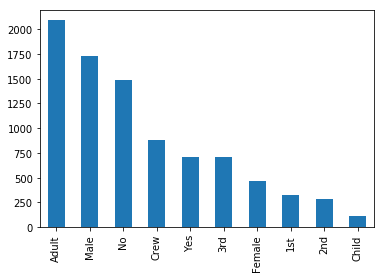

In [41]:
passenger_info.loc[:,'Index'].value_counts().plot(kind='bar')
plt.show()
#code borrowed from Professor Cannon.

Bar graph above shows the distribution of items in the itemsets. 'Adult' has the largest frequency and 'Child' has the smallest frequency as expected.

#### 6. Find some association rules for these data.  Start with the default settings.  How many rules do you find?  Describe or explain two of them (including the meaning of the support, confidence, and lift metrics).

In [42]:
from mlxtend.frequent_patterns import association_rules

rules_conf=association_rules(frequent_itemsets, metric="confidence", min_threshold=0.8)
print(rules_conf.shape)
rules_conf.head()
#code borrowed from Professor Cannon.

(73, 9)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sex_Male),(Age_Adult),0.786461,0.950477,0.757383,0.963027,1.013204,0.009870,1.339441
1,(Survived_No),(Age_Adult),0.676965,0.950477,0.653339,0.965101,1.015386,0.009900,1.419023
2,(Survived_No),(Sex_Male),0.676965,0.786461,0.619718,0.915436,1.163995,0.087312,2.525187
3,"(Survived_No, Age_Adult)",(Sex_Male),0.653339,0.786461,0.603816,0.924200,1.175139,0.089991,2.817152
4,"(Survived_No, Sex_Male)",(Age_Adult),0.619718,0.950477,0.603816,0.974340,1.025106,0.014788,1.929980


In this data set, we find a total of 79 rules. <br>

Rule: If-then statement between an antecedent and a consequent. <br>
Support: How frequently the rule appears in the data. <br>
Confidence: The number of times the if-then statements are true (conditional probability). <br>
Lift: Strength of a rule against random chance(independent). Larger the lift ratio, greater the strength of association. <br>

Let's examine the first two rule: (Male -> Adult) and (Didn't survive -> Adult). <br>

(Male -> Adult): <br>
support = 0.757. This means that this rule happens 0.757 times in the dataset. <br>
confidence = 0.963. This means that out of all the itemsets that include 'Male', 0.963 of them contain both 'Male' and 'Adult'. <br>
lift = 1.013. Since the lift ratio of this rule is larger than 1, we can conclude that there is a relationship between the antecedent and consequent. <br>
Conclusion of rule: Out of all the passengers, 0.757 of them were male adults. Out of all the male passengers, 0.963 of them were adults. The lift ratio indicates that in this dataset, there is a relationship between being a male and an adult. 

(Didn't survive -> Adult): <br>
support = 0.653. This means that this rule happens 0.653 times in the dataset. <br>
confidence = 0.965. This means that out of all the itemsets that include 'Didn't survive', 0.965 of them contain both 'Didn't survive' and 'Adult'. <br>
lift = 1.015. Since the lift ratio of this rule is larger than 1, we can conclude that there is a relationship between the antecedent and consequent. <br>
Conclusion of rule: Out of all the passengers, 0.653 of them were adults who didn't survive. Out of all the deaths, 0.965 of them were adults. The lift ratio indicates that in this dataset, there is a relationship between not surviving and being an adult.

#### 7. Now let's look for some strong rules.  How will you do this? What do you find?

We will start by raising the min_support level to 0.5 to root out the itemsets with support level lower than 0.5.

In [43]:
frequent_itemsets1=apriori(titanic_dummies, min_support=0.5, use_colnames=True)
print(type(frequent_itemsets1))
print(frequent_itemsets1.shape)
#code borrowed from Professor Cannon.

<class 'pandas.core.frame.DataFrame'>
(7, 2)


Doing so already narrows down the number of rules to 7. Now let's recreate the rules again with the same min_threshold value of 0.8.

In [49]:
rules_conf=association_rules(frequent_itemsets1, metric="confidence", min_threshold=0.8)
print(rules_conf.shape)
rules_conf

(6, 9)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sex_Male),(Age_Adult),0.786461,0.950477,0.757383,0.963027,1.013204,0.009870,1.339441
1,(Survived_No),(Sex_Male),0.676965,0.786461,0.619718,0.915436,1.163995,0.087312,2.525187
2,(Survived_No),(Age_Adult),0.676965,0.950477,0.653339,0.965101,1.015386,0.009900,1.419023
3,"(Survived_No, Age_Adult)",(Sex_Male),0.653339,0.786461,0.603816,0.924200,1.175139,0.089991,2.817152
4,"(Survived_No, Sex_Male)",(Age_Adult),0.619718,0.950477,0.603816,0.974340,1.025106,0.014788,1.929980
5,(Survived_No),"(Age_Adult, Sex_Male)",0.676965,0.757383,0.603816,0.891946,1.177669,0.091095,2.245337


We will now examine if there are any overlapping rules between the confidence and lift methods.

In [51]:
rules_lift = association_rules(frequent_itemsets1, metric="lift", min_threshold=1.01)
print(rules_lift.shape)
rules_lift

(12, 9)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Age_Adult),(Sex_Male),0.950477,0.786461,0.757383,0.796845,1.013204,0.009870,1.051116
1,(Sex_Male),(Age_Adult),0.786461,0.950477,0.757383,0.963027,1.013204,0.009870,1.339441
2,(Survived_No),(Sex_Male),0.676965,0.786461,0.619718,0.915436,1.163995,0.087312,2.525187
3,(Sex_Male),(Survived_No),0.786461,0.676965,0.619718,0.787984,1.163995,0.087312,1.523634
4,(Survived_No),(Age_Adult),0.676965,0.950477,0.653339,0.965101,1.015386,0.009900,1.419023
5,(Age_Adult),(Survived_No),0.950477,0.676965,0.653339,0.687380,1.015386,0.009900,1.033317
6,"(Survived_No, Age_Adult)",(Sex_Male),0.653339,0.786461,0.603816,0.924200,1.175139,0.089991,2.817152
7,"(Survived_No, Sex_Male)",(Age_Adult),0.619718,0.950477,0.603816,0.974340,1.025106,0.014788,1.929980
8,"(Age_Adult, Sex_Male)",(Survived_No),0.757383,0.676965,0.603816,0.797241,1.177669,0.091095,1.593193
9,(Survived_No),"(Age_Adult, Sex_Male)",0.676965,0.757383,0.603816,0.891946,1.177669,0.091095,2.245337


All the rules that are in rules_conf are also in rules_lift, giving us six very strong rules: <br>
1. (Sex_Male)->(Age_Adult)
2. (Survived_No)->(Sex_Male)	
3. (Survived_No)->(Age_Adult)	
4. (Survived_No, Age_Adult)->(Sex_Male)	
5. (Survived_No, Sex_Male)->(Age_Adult)	
6. (Survived_No)->(Age_Adult, Sex_Male)	

All six rules have the following traits: <br>
1. Minimum support of 0.5
2. Minimum confidence of 0.8
3. Minimum lift of 1.01

#### 8. What rules can you find that tell us about survivors? Who was most likely to survive? How confident are we in those rules?

The following rules tell us about survivors (confidence): <br>
1. (Survived_No)->(Sex_Male) (0.915)
2. (Survived_No)->(Age_Adult) (0.965)
3. (Survived_No, Age_Adult)->(Sex_Male) (0.924)
4. (Survived_No, Sex_Male)->(Age_Adult) (0.974)
5. (Survived_No)->(Age_Adult, Sex_Male) (0.892)

Based on these rules, the most likely demographic to survive were probably female children.

#### 9. Investigate your survivor rules further.  Are there any redundant rules?  Give one example.

1. (Survived_No, Age_Adult)->(Sex_Male) (0.924)
2. (Survived_No, Sex_Male)->(Age_Adult) (0.974)
3. (Survived_No)->(Age_Adult, Sex_Male) (0.892)

The three rules above have different conditional probabilities due to different support values, which leads to different confidence values, but they point to the same implication that adult males were least likely to survive.

#### 10. Identify and explain one thing you find interesting in your rules that you wouldn't have expected. 

Although examining the titanic data set through the use of association rules was interesting, there's actually nothing that is surprising about the results. It is a widely known fact that women and children were evacuated first and adult men last during the sinking of the Titanic. If there's one thing interesting it's that none of the rules indicate that the cabin class level had a strong relationship with the likelihood of survival, despite our EDA saying 1st class passengers had the highest survival rate of 62.46% compared to the other cabin classes.

#### Extra credit (5 points):  Perform an appropriate clustering exercise on the Titanic data. Do you find any relationship between your association rules and the resulting clusters?  If so, give one example.  If not, why do you think that is?

In [80]:
from sklearn.preprocessing import StandardScaler
titanic_num_z = pd.DataFrame(StandardScaler().fit_transform(titanic_dummies), columns = titanic_dummies.columns, index = titanic_dummies.index)

In [81]:
from sklearn.cluster import KMeans
titanic_km = KMeans(n_clusters = 2, random_state = 1234)
kmeans_out = titanic_km.fit_predict(titanic_num_z)

In [82]:
titanic = titanic.assign(kmeans=titanic_km.labels_)
titanic.head(5)

,Class,Sex,Age,Survived,kmeans
0,3rd,Male,Child,No,0
1,3rd,Male,Child,No,0
2,3rd,Male,Child,No,0
3,3rd,Male,Child,No,0
4,3rd,Male,Child,No,0


In [83]:
titanic_num_z.head()

,Class_1st,Class_2nd,Class_3rd,Class_Crew,Sex_Female,Sex_Male,Age_Adult,Age_Child,Survived_No,Survived_Yes
0,-0.416222,-0.385678,1.455185,-0.820056,-0.521075,0.521075,-4.380943,4.380943,0.690783,-0.690783
1,-0.416222,-0.385678,1.455185,-0.820056,-0.521075,0.521075,-4.380943,4.380943,0.690783,-0.690783
2,-0.416222,-0.385678,1.455185,-0.820056,-0.521075,0.521075,-4.380943,4.380943,0.690783,-0.690783
3,-0.416222,-0.385678,1.455185,-0.820056,-0.521075,0.521075,-4.380943,4.380943,0.690783,-0.690783
4,-0.416222,-0.385678,1.455185,-0.820056,-0.521075,0.521075,-4.380943,4.380943,0.690783,-0.690783


In [93]:
pd.DataFrame(titanic_km.cluster_centers_)

,0,1,2,3,4,5,6,7,8,9
0,-0.214024,-0.081489,-0.039925,0.248658,-0.521075,0.521075,0.130193,-0.130193,0.325497,-0.325497
1,0.633218,0.241096,0.118122,-0.735689,1.541670,-1.541670,-0.385194,0.385194,-0.963028,0.963028


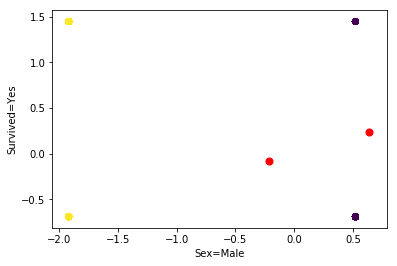

In [95]:
plt.scatter(titanic_num_z['Sex_Male'], titanic_num_z['Survived_Yes'], c=titanic.kmeans)
plt.scatter(titanic_km.cluster_centers_[:, 0], titanic_km.cluster_centers_[:, 1], c='red', s=50)
plt.xlabel('Sex=Male')
plt.ylabel('Survived=Yes')
plt.show()

I don't see a relationship between my association rules and the resulting cluster. This is presumably because the underlying calculation for the two methods are different. While association rules use conditional probabilities between variables to find the relationship between them, clustering measures distances between data points and groups the ones that are close to each other. This is especially difficult in a data set such as this one because all the variables are categorical that can only take in two or three values when converted to dummy variables, so there isn't much distance measuring happening.

## Working code below

All working code is shown under each question.